<a href="https://colab.research.google.com/github/RajaChowdhury/Credit-Card-Default-Prediction---Capstone-Project/blob/main/Credit_Card_Default_Prediction_Capstone_Project_Raja_Chowdhury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,roc_auc_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,cross_val_score


# This will ignore all the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# # Mounting The Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install --upgrade xlrd # Installing xlrd for reading xls format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [6]:
# Reading the dataset
df = pd.read_excel('/content/drive/MyDrive/Credit Card Default Prediction- Capstone Project- Raja Chowdhury/Default Of Credit Card Clients.xls',header =1)

In [7]:
# Removing the limitations in viewing the total columns 
pd.set_option('max_columns',None)

In [8]:
# This will show you the values of first 5 rows
df.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# This will view the name of all columns
df.columns 

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
#This will show the type of each feature present in out dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Null Value Treatment

In [11]:
# Counting the null values
print(f'Total Number of Null Values: {df.isna().sum().sum()}')

Total Number of Null Values: 0


# Since there are no null values no null value treatment is required

In [12]:
#This returns the statistical summary of the dataframe or series.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## Data Preprocessing

In [13]:
#Replacing the name from 0 to 1 in order to maintain the sequence 
df.rename(columns={'PAY_0':'PAY_1'},inplace=True) 

In [14]:
# Cleaning Education
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4

In [15]:
# Cleaning Marriage
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3

In [16]:
# Changing the name for better readability
df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [17]:
# Creating Age Buckets Column for EDA
def age_buckets(x):
  if x>20 and x<=30:
    age='20-30'
  elif x>30 and x<=40:
    age= '31-40'
  elif x>40 and x<=50:
    age= '41-50'
  else:
    age= '60+'
  return age

df['age_buckets']=df['AGE'].apply(age_buckets)

### **Handling Outliers**

In [18]:
# Printing the number of rows and columns before outlier treatment
print('\033[1mBefore Outlier Treatment\033[0m')
print('Number of rows: {}\nNumber of columns:{}'.format(df.shape[0],df.shape[1]))

Before Outlier Treatment
Number of rows: 30000
Number of columns:26


In [19]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month', 'age_buckets'],
      dtype='object')

In [ ]:
# Plotting Box plots to check outliers

lst_box = df[[ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']]

# Box plot to detect outliers
plt.figure(figsize = (70,150))
sns.set_theme()
for i in enumerate(lst_box):
  plt.subplot(12, 2, i[0]+1)
  sns.set(font_scale = 2)
  sns.boxplot(df[i[1]],color='#6C9DBF')
  plt.xlabel(i[1], fontsize=40)
sns.reset_orig()

In [20]:
# Treating Pay Columns
# Since 90 percent of our PAY data lies between -2 and 1 we will remove rest of the observations
df = df[(df.PAY_SEPT < 2) & (df.PAY_AUG < 2) & (df.PAY_JUL < 2) & (df.PAY_JUN < 2) & (df.PAY_MAY < 2)  & (df.PAY_MAY < 2) & (df.PAY_APR < 2)]

In [21]:
# Treating Limit Balance
# Removing outliers using z score method on Limit Balance column.
df['Z_LIMIT_BAL'] = np.abs(stats.zscore(df['LIMIT_BAL']))
df = df[(df['Z_LIMIT_BAL'] < 3)]
df.drop(['Z_LIMIT_BAL'],axis=1,inplace=True)

# Treating Age Column
df=df[(df.AGE)<61]

# Treating Education Column
df=df[(df.EDUCATION)<4]

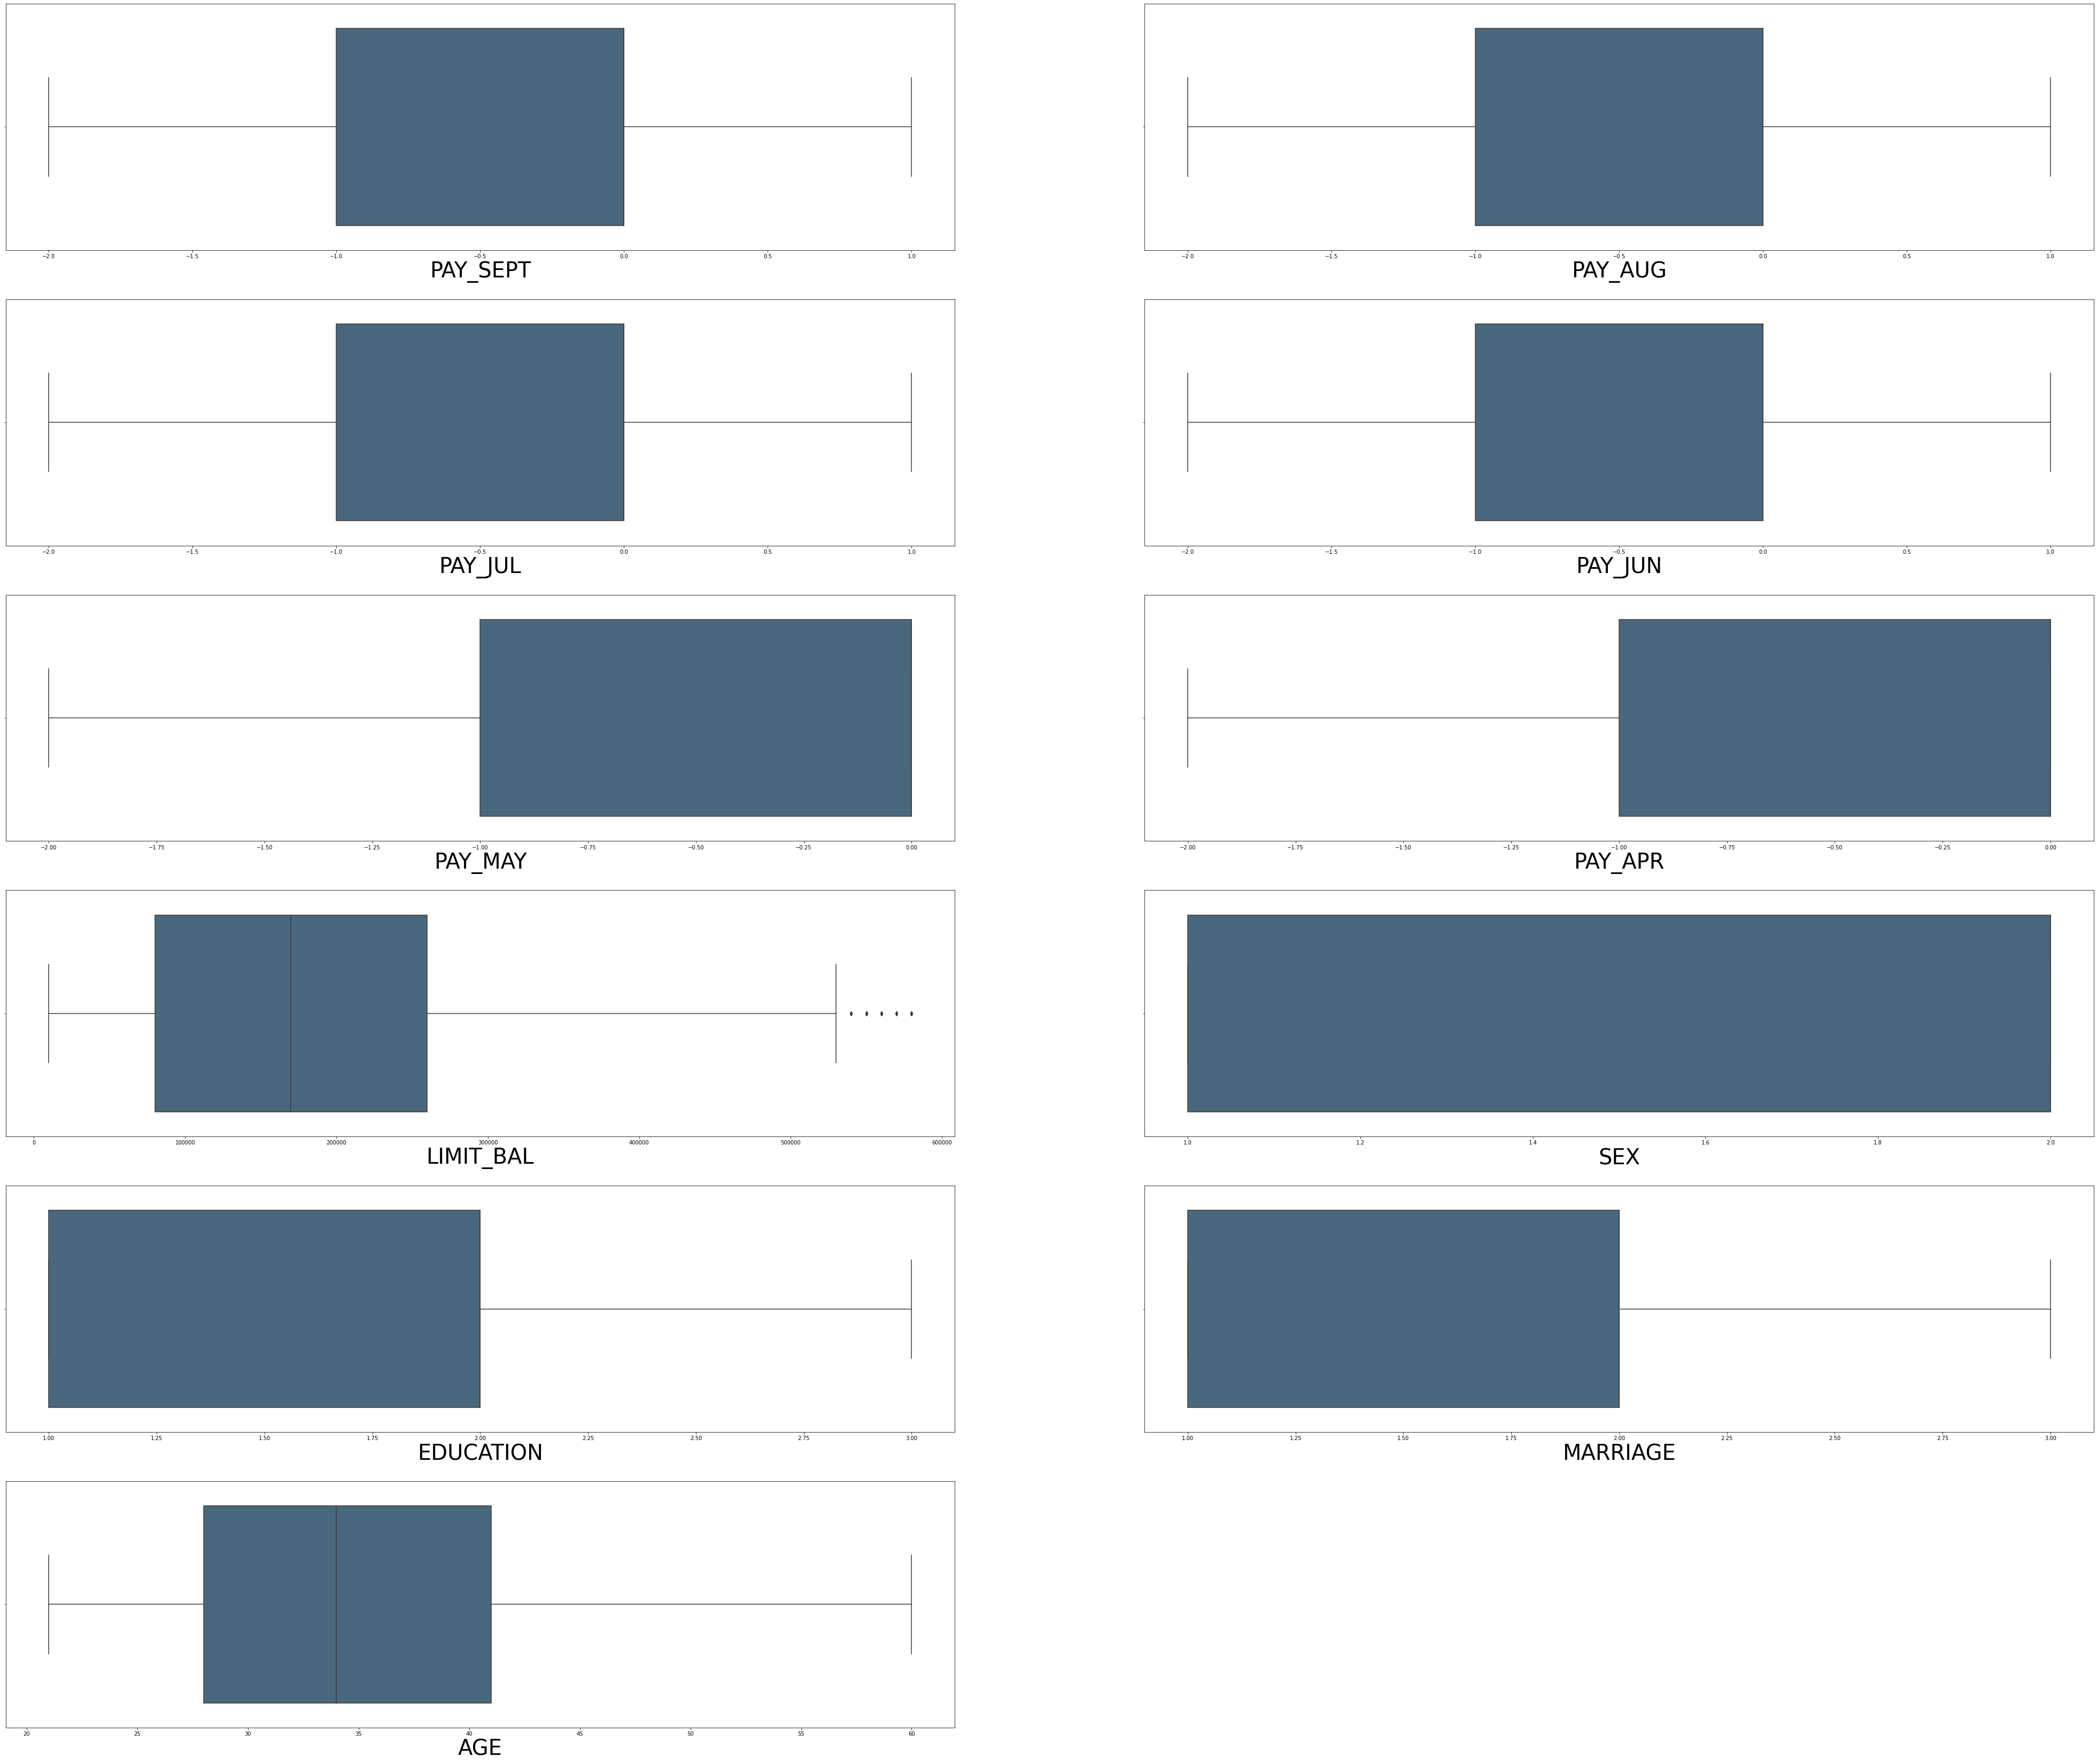

In [22]:
lst_box = df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE']]
# Box plot to detect outliers
plt.figure(figsize = (70,100))
# sns.set_theme()
for i in enumerate(lst_box):
  plt.subplot(10, 2, i[0]+1)
#   sns.set(font_scale = 2)
  sns.boxplot(df[i[1]], color= '#416986')
  plt.xlabel(i[1], fontsize=40)

sns.reset_orig()

In [23]:
# Since the box plot of BILL_AMT and PAY_AMT shows that most of the data belongs outside of 4th quartile removing outliers is not feasible 
# to remove outliers from them
print('\033[1mAfter Outlier Treatment\033[0m')
print('Number of rows   :{}\nNumber of columns:{}'.format(df.shape[0],df.shape[1]))

After Outlier Treatment
Number of rows   :20928
Number of columns:26


We have successfully tried to remove most outliers